In [1]:
import pandas as pd 
from sklearn.metrics import classification_report,roc_auc_score, roc_curve

data = pd.read_csv('uci_malware_detection.csv')
data = data.dropna()
data = data.drop_duplicates()
data

,Label,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_522,F_523,F_524,F_525,F_526,F_527,F_528,F_529,F_530,F_531
0,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,non-malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
369,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
370,malicious,1,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
371,malicious,1,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [2]:
x = data.drop(["Label"],axis=1)
y = data['Label'].values

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [4]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)#

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [6]:

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(units=50, activation='relu', input_shape=(None, 1)))
model.add(Dense(1))

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test) )

Epoch 1/50
3/3 [==============================] - 3s 551ms/step - loss: 0.1604 - accuracy: 0.8142 - val_loss: 0.1639 - val_accuracy: 0.8000
Epoch 2/50
3/3 [==============================] - 1s 368ms/step - loss: 0.1491 - accuracy: 0.8142 - val_loss: 0.1536 - val_accuracy: 0.8000
Epoch 3/50
3/3 [==============================] - 1s 370ms/step - loss: 0.1395 - accuracy: 0.8142 - val_loss: 0.1440 - val_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 1s 370ms/step - loss: 0.1300 - accuracy: 0.8142 - val_loss: 0.1346 - val_accuracy: 0.8000
Epoch 5/50
3/3 [==============================] - 1s 367ms/step - loss: 0.1208 - accuracy: 0.8142 - val_loss: 0.1256 - val_accuracy: 0.8000
Epoch 6/50
3/3 [==============================] - 1s 375ms/step - loss: 0.1127 - accuracy: 0.8142 - val_loss: 0.1172 - val_accuracy: 0.8000
Epoch 7/50
3/3 [==============================] - 1s 374ms/step - loss: 0.1049 - accuracy: 0.8142 - val_loss: 0.1091 - val_accuracy: 0.8000
Epoch 8/50
3/3 [====

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model Loss: {loss}\nModel Accuracy: {accuracy*100}")

3/3 [==============================] - 0s 83ms/step - loss: 0.0238 - accuracy: 0.9733
Model Loss: 0.023782016709446907
Model Accuracy: 97.33333587646484


Text(0, 0.5, 'Loss')

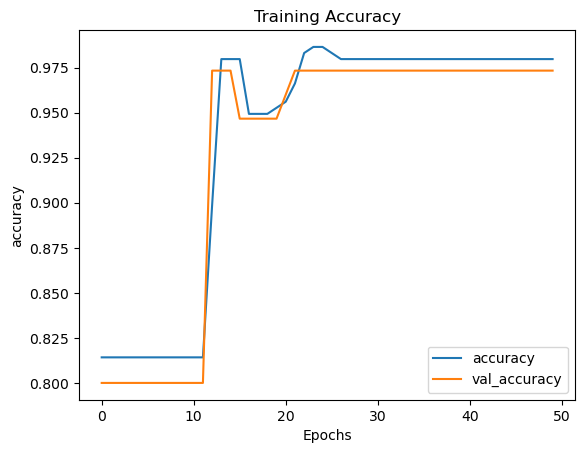

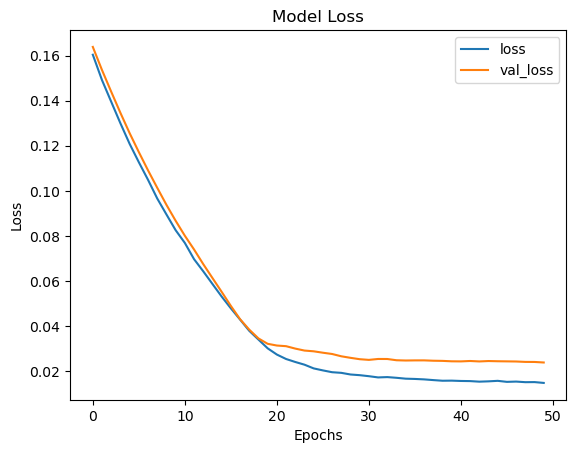

In [12]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [13]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

3/3 [==============================] - 0s 63ms/step


In [14]:
# classification report
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.93      0.93      0.93        15

    accuracy                           0.97        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.97      0.97        75



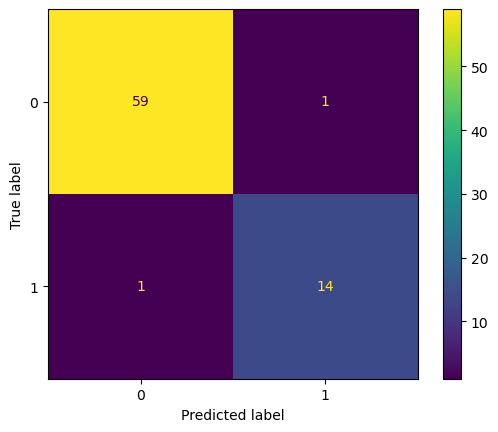

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)

# plot the confusion matrix
cm_display.plot()
plt.show()

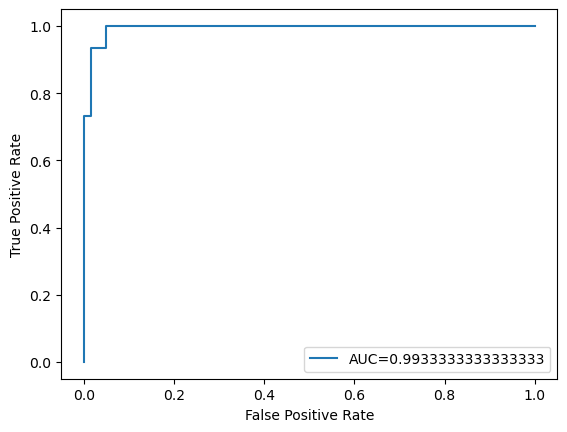

In [16]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
model.save("gru_malware_detection_data.h5")